In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

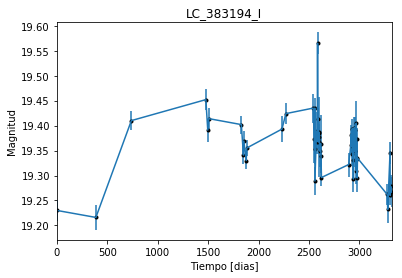

In [2]:
data = np.genfromtxt('LC_383194_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_383194_I')
plt.savefig("LC_383194_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

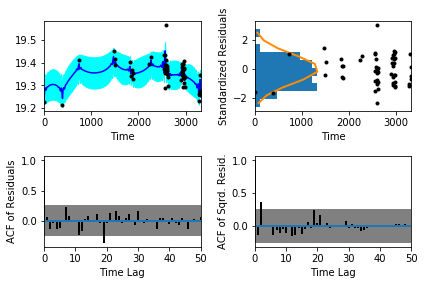

In [5]:
sample.assess_fit()

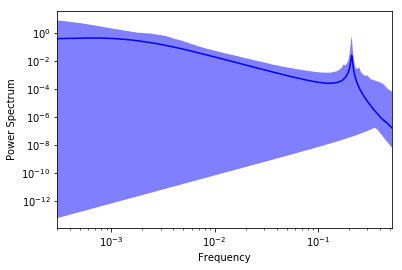

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

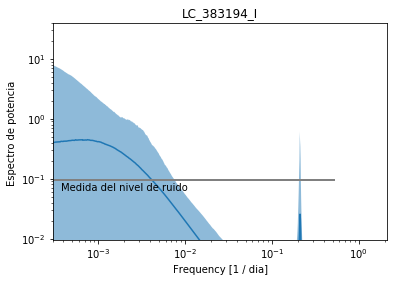

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_383194_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_383194_I')

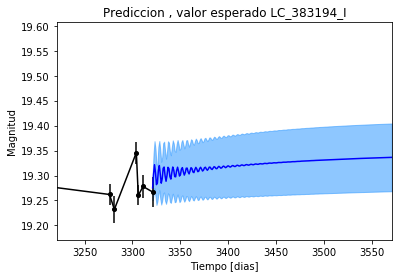

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_383194_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_383194_i')

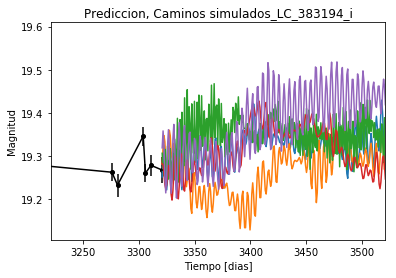

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_383194_i')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


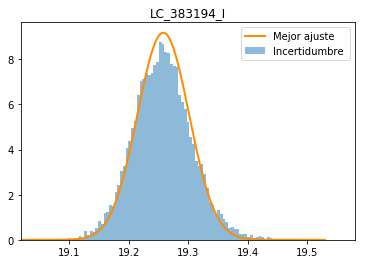

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_383194_I')
plt.savefig("Mejor_ajuste_LC_383194_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_383194_I')

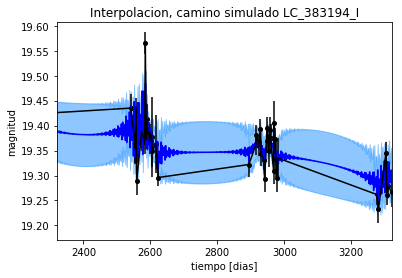

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_383194_I')

Text(0.5,1,'Interpolacion, camino simulado LC_383194_I')

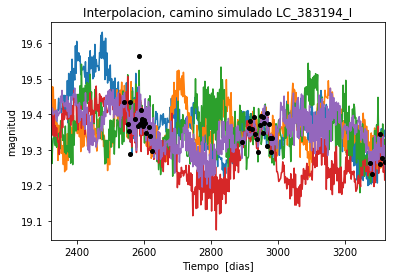

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_383194_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 317.481089951
Median: 0.00184697718297
Standard deviation: 0.0340825844665
68% credibility interval: [ 0.0007262   0.00587416]
95% credibility interval: [ 0.00037162  0.04218538]
99% credibility interval: [ 0.00031505  0.2783493 ]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 264.01779639
Median: 0.00184321337894
Standard deviation: 0.0304349606053
68% credibility interval: [ 0.00072596  0.00586442]
95% credibility interval: [ 0.00037162  0.04004233]
99% credibility interval: [ 0.00031505  0.26783049]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 2063.31970168
Median: 0.135961459629
Standard deviation: 0.259138436873
68% 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 491.654045111
Median: 111.50977621
Standard deviation: 2.3504028973
68% credibility interval: [ 108.79151494  112.89678863]
95% credibility interval: [ 104.9611705   113.83824605]
99% credibility interval: [ 101.89402034  114.27440666]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 539.497175841
Median: 0.927962610278
Standard deviation: 1.69970689425
68% credibility interval: [ 0.05237371  3.34226889]
95% credibility interval: [ 0.01984735  5.8679745 ]
99% credibility interval: [ 0.0134084   6.50737596]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 314.20999483
Median: 1.82410104458
Standard deviation: 16.1877474151
68% credibility interval: [ 1.7480946   2.58590859]
95% credibility interval: [  1.46873648  64.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 827.706929458
Median: 1.36204652175e-06
Standard deviation: 1.42814746363e+81
68% credibility interval: [  1.71828040e-86   3.54331960e+62]
95% credibility interval: [  1.28262486e-123   1.09072724e+080]
99% credibility interval: [  1.69702604e-152   2.37574591e+080]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1111.25323227
Median: 19.3428933195
Standard deviation: 0.0296370818061
68% credibility interval: [ 19.31337701  19.36498047]
95% credibility interval: [ 19.26993866  19.39165934]
99% credibility interval: [ 19.2437107   19.43156679]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 310.296813357
Median: 0.212074683678
Standard deviation: 0.221939974474
68% credibility interval: [ 0.20853007  0.24498086]
95% credibility interval: [ 0.18139437  1.00460421]
99% credibility interval: [ 0.15947129  1.0055224 ]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 310.296813357
Median: 0.212074683678
Standard deviation: 0.221939974474
68% credibility interval: [ 0.20853007  0.24498086]
95% credibility interval: [ 0.18139437  1.00460421]
99% credibility interval: [ 0.15947129  1.0055224 ]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 345.464711896
Median: 0.0
Standard deviation: 0.199860169267
68% credibi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 491.654045111
Median: 111.50977621
Standard deviation: 2.3504028973
68% credibility interval: [ 108.79151494  112.89678863]
95% credibility interval: [ 104.9611705   113.83824605]
99% credibility interval: [ 101.89402034  114.27440666]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 945.978081276
Median: 0.00574003318697
Standard deviation: 0.00406334544928
68% credibility interval: [ 0.00383031  0.00979367]
95% credibility interval: [ 0.00271349  0.01757434]
99% credibility interval: [ 0.00216475  0.02676106]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 849.457223302
Median: 1.07768391547
Standard deviation: 0.227760809728
68% credibility interval: [ 0.88693161  1.32327168]
95% credibility interval: [ 0.74731249  1.65749609]
99% credibility interval: [ 0.65859155  1.87555836]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 404.183631913
Median: 0.014508764919
Standard deviation: 0.1692012046
68% credibility interval: [  3.92164292e-65   5.26710826e-02]
95% credibility interval: [  1.44855779e-81   1.22425555e-01]
99% credibility interval: [  4.52920053e-82   1.39729771e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 317.481089951
Median: (-0.0116048998987-1.3166736544j)
Standard deviation: 1.41083710741
68% credibility interval: [-0.03690844-1.34645471j -0.00456284-1.32593829j]
95% credibility interval: [-0.26505855-5.26980304j -0.00233494-1.33453569j]
99% credibility interval: [-1.74892024-2.0041407j  -0.00197954-1.34410975j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 264.01779639
Median: (-0.0115812512206+1.32022116714j)
Standard deviation: 1.40754064281
68% credibility interval: [-0.03684724+1.33882257j -0.00456137+1.32138429j]
95% credibility interval: [-0.25159341+0.77378742j -0.00233494+1.33453569j]
99% credibility interval: [-1.68282860+1.69913252j -0.00197954+1.34410975j]
Posterior summary for parameter ar_roots  elem